AS I HAVE ALREADY LEARN ABOUT LOGISTIC REGRESSION SO I THINK I SHOULD START  BOTH USING LIBARY AND MANUALLY ITS MY today goal lets do it ..
//I WILL FOLLOW THE FOLLWOING PROCESS
..PROCESSING,EDA, PLOT GRAPH AND UNDERSTAND 
.... improve accuracy and all 
lets do it 
go boy...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
#removed unwanted rows here... [:,1:] initial : means keep all rows as it it and ,1: means 1 onward means drop coloumn 0
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


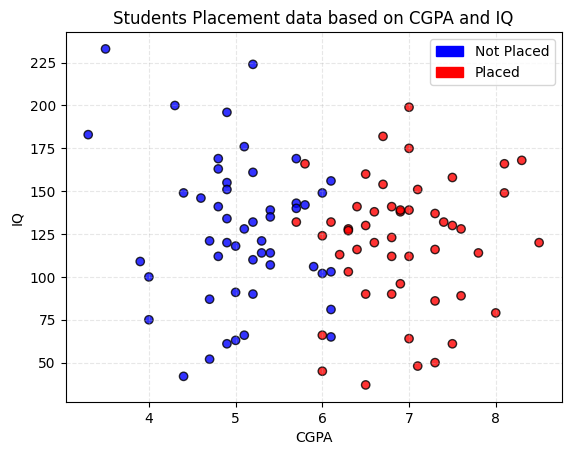

In [6]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'],
             cmap='bwr',         
                      edgecolor='k',      
                      alpha=0.8)     

plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Students Placement data based on CGPA and IQ")    

#additional
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color='blue', label='Not Placed'),
                 mpatches.Patch(color='red', label='Placed')]
plt.legend(handles=legend_labels)

# Optional: Add grid
plt.grid(True, linestyle='--', alpha=0.3)

In [7]:
#now seperatle the feature means INPUT with the Output

X=df.iloc[:,0:2]
Y=df.iloc[:,-1:]
print(X)
print(Y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
    placement
0           1
1           0
2           0
3           1
4           0
..        ...
95          0
96          0
97          1
98          1
99          1

[100 rows x 1 columns]


In [8]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train


array([[-0.13134763, -0.45458616],
       [-1.14723945,  1.16750543],
       [ 0.97689799,  0.70405069],
       [-0.03899383,  0.00886858],
       [-0.96253185, -0.84079845],
       [-0.77782424,  0.21484846],
       [ 0.60748279,  1.50222275],
       [-0.22370143,  0.47232332],
       [-0.87017804,  1.34773783],
       [-0.03899383, -2.02518279],
       [ 1.438667  ,  0.11185852],
       [-0.96253185, -0.14561634],
       [ 0.51512898, -0.09412136],
       [ 0.97689799, -1.94794033],
       [ 0.60748279,  0.78129315],
       [-0.03899383, -1.48448559],
       [-1.14723945,  1.01302052],
       [ 0.88454419,  0.39508086],
       [ 1.90043601,  0.65255572],
       [-1.33194705,  0.57531326],
       [-0.87017804, -1.48448559],
       [ 0.88454419, -0.30010125],
       [ 0.88454419,  1.93993   ],
       [ 0.42277518, -2.23116267],
       [ 0.88454419, -1.53598056],
       [ 0.05335997, -1.51023307],
       [-1.51665466,  0.65255572],
       [ 0.88454419,  1.32199035],
       [-0.31605523,

In [10]:
X_test = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [12]:
y_test= np.array(y_test, dtype=np.int64)
y_test

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


1.0

<Axes: >

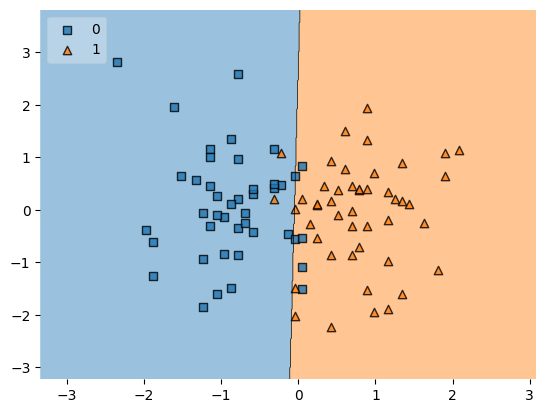

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.to_numpy().ravel(), clf=clf, legend=2)


In [15]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))
